<a href="https://colab.research.google.com/github/haeniKim/metaverse-academy/blob/master/DL/230628_pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
x = torch.randn(100, 1)
x *= 10
x.size() #100행, 1열의 2차원 텐서.

torch.Size([100, 1])

In [ ]:
y = x + torch.randn(100,1)
y

tensor([[ -3.5708],
        [ 12.0035],
        [ 20.9827],
        [  8.4539],
        [ -2.7803],
        [ -5.8663],
        [  0.8034],
        [ -4.1146],
        [  3.0286],
        [ 14.3796],
        [  2.2147],
        [-12.3751],
        [  1.1864],
        [ -5.0816],
        [  5.2967],
        [ -8.0994],
        [ -6.6036],
        [  0.8097],
        [  5.1092],
        [ -3.0490],
        [ 10.9132],
        [ -4.6420],
        [ -1.1291],
        [  3.9640],
        [  3.9295],
        [-10.1570],
        [  7.0371],
        [ -7.2947],
        [ 10.4986],
        [  1.5501],
        [ 20.9227],
        [ 15.5120],
        [-21.8663],
        [ 11.9759],
        [  1.0228],
        [ 19.4209],
        [  0.4790],
        [ 13.2342],
        [ -9.7601],
        [  4.8100],
        [ 11.6895],
        [-11.7797],
        [  1.1496],
        [-25.8370],
        [ 16.1862],
        [  8.4962],
        [ -6.7464],
        [  3.5501],
        [ -4.2892],
        [ -3.5335],


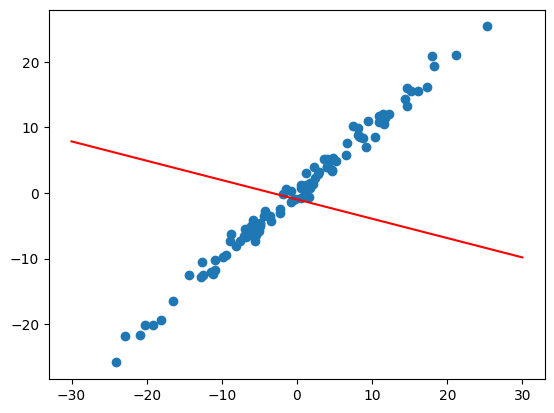

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x1, y1, 'r')

plt.show()



In [ ]:
import torch.nn as nn

class LRModel(nn.Module): # nn.Module 을 상속
  def __init__(self):
    super(LRModel, self).__init__()
    self.layer = nn.Linear(1, 1) #input - outout

  def forward(self, x): # 실제 데이터가 들어오는 곳
    x = self.layer(x)
    return x

model = LRModel()
model

LRModel(
  (layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
w, b = model.parameters()

In [ ]:
print(w)
print(b)

Parameter containing:
tensor([[-0.2947]], requires_grad=True)
Parameter containing:
tensor([-0.9794], requires_grad=True)


In [ ]:
import numpy as np

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30, 30])
y1 = w1 * x1 + b1

< 학습을 시킬 때 필요한 것들 >
* 손실함수 - 회귀는 mse 많이 사용
* 최적화 함수
* metrics
* epochs
* learning rate

In [ ]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001 )
epochs = 20

cri_list = []

for epoch in range(epochs):
  optimizer.zero_grad() #optimizer 초기화

  pred = model(x)
  loss = criterion(pred, y)
  cri_list.append(loss.item())
  loss.backward()
  print(f'{epoch+1} loss: {loss.item()}')
  optimizer.step()



# 검증 데이터는 다시 돌려야함.
# 기본적인 torch 의 패턴

1 loss: 172.92300415039062
2 loss: 110.94573211669922
3 loss: 71.48910522460938
4 loss: 46.3691520690918
5 loss: 30.375978469848633
6 loss: 20.192941665649414
7 loss: 13.708647727966309
8 loss: 9.578988075256348
9 loss: 6.948300361633301
10 loss: 5.271867752075195
11 loss: 4.202922821044922
12 loss: 3.520711660385132
13 loss: 3.0847036838531494
14 loss: 2.8054349422454834
15 loss: 2.6259546279907227
16 loss: 2.5100057125091553
17 loss: 2.4345078468322754
18 loss: 2.3847687244415283
19 loss: 2.351433753967285
20 loss: 2.3285486698150635


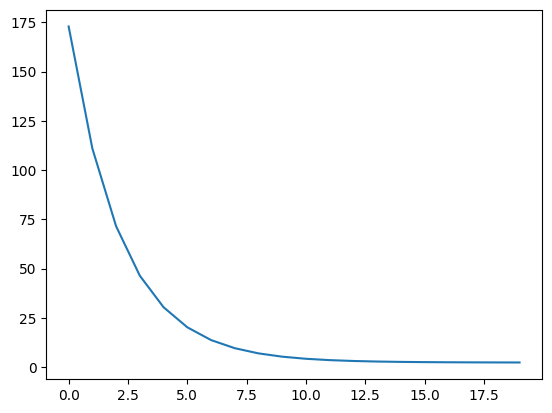

In [ ]:
plt.plot(range(epochs), cri_list)
plt.show()

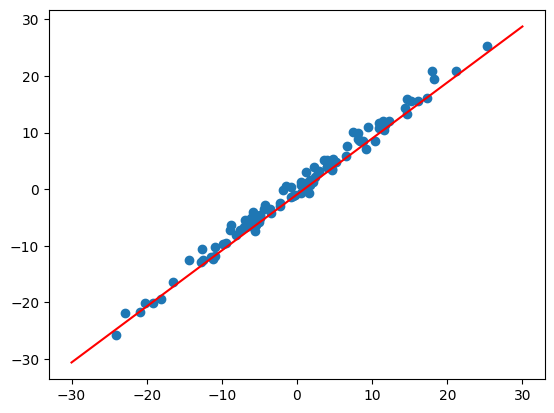

In [ ]:
w,b = model.parameters()

w1 = w[0][0].item()
b1 = b[0].item()

x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.scatter(x,y)
plt.plot(x1,y1,'r')
plt.show()